# Forest Cover Fraction
Input: 
- Forest4model_v1_Forest_cover_fraction

Aim:
- Visualising forest cover fraction in sample countries
- Differentiating the forest cover fraction to 10 bin classes (fraction data is ranging from 0 to 1)
- Calculating percentage share of each forest cover fraction class over country's total forest cover

Output:
- A dataframe containing the percentage share of forest cover fraction classes in 32 EU countries

In [20]:
# Vector data
import geopandas as gpd

# Tabular data 
import pandas as pd
import numpy as np

# Raster array
import xarray as xr

# Plotting
import matplotlib.pyplot as plt

# System
from pathlib import Path

# Import functions from geo_tools module
import sys
sys.path.append("/mnt/PROVIDE/firzar/forest_data_analysis/src")
import geo_tools
from geo_tools import utils, plot_iso_forest

# Reloads module
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Output directory

In [2]:
# Specify the desired output folder path for processed dataset
output_data_dir = Path.cwd() / ".." / "output_data"

# Check if the output folder exists, and create if not
Path.mkdir(output_data_dir, exist_ok=True, parents=True)

In [3]:
# Specify the desired output folder path for figures
output_figure_dir = Path.cwd() / ".." / "output_figures"

# Check if the output folder exists, and create if not
Path.mkdir(output_figure_dir, exist_ok=True, parents=True)

# A list of ISO3 codes of EU countries

In [4]:
eu_iso3 = pd.read_csv(output_data_dir/"Country_Codes_and_Names_ISO3.csv")

eu_iso = eu_iso3["ISO3"]

# Plotting data distribution

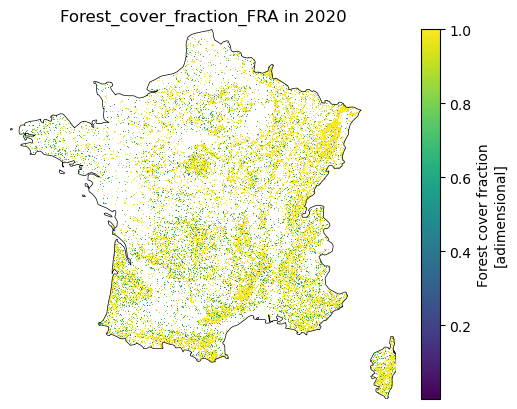

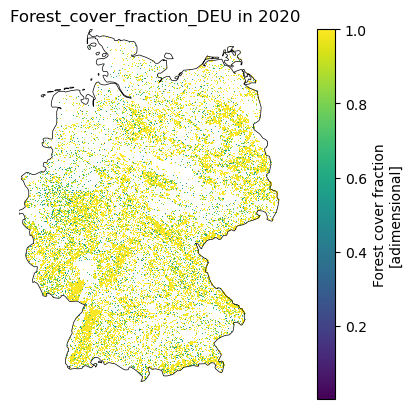

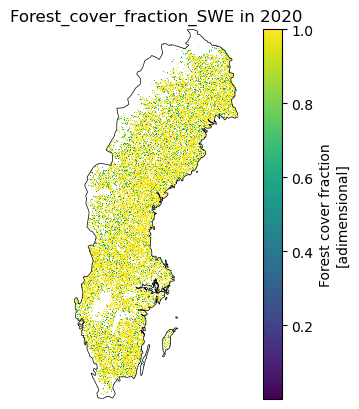

In [6]:
# Testing plot_iso_forest for many countries at once
for iso in ["FRA", "DEU", "SWE"]:
    plot_iso_forest.plot_forest(
        iso_code=iso,
        xarray_id="Forest_cover_fraction"
    )

# Differentiating classes for forest cover fraction

In [65]:
%%time

# Import forest cover data
forest_cover = pd.read_csv(output_data_dir/"iso_forest_cover_stats.csv")

# Template to store country results in Mha
forest_fraction_ha = []

# Template to store country results in percentage share
forest_fraction_perc = []

for iso in eu_iso:

    # Calculate areas for each class
    iso_fraction_class = utils.define_class(
        iso_code=iso, 
        xarray_id="Forest_cover_fraction",
        forest_layer_year=2020,
        start_step=0,
        end_step=0.1,
        delta_diff=0.1,
        max_val=1,
    )
    forest_fraction_ha.append(iso_fraction_class)

    # Get forest cover area within the country
    iso_forest_cover = forest_cover.loc[forest_cover.Region == iso]
    value_to_copy = iso_forest_cover.iloc[0, 5]

    # Copy forest cover to iso_fraction_class
    iso_fraction_class[f"{iso}_forest_cover_Mha"] = value_to_copy

    # Calculate percentage share of fraction classes over total forest cover
    iso_fraction_class["Percentage share"] = iso_fraction_class["Value"] / iso_fraction_class[f"{iso}_forest_cover_Mha"]

    # Creating final dataset
    iso_fraction_class_perc = iso_fraction_class.drop(["Unit", "Value", f"{iso}_forest_cover_Mha"], axis=1)

    iso_fraction_class_perc.insert(
        loc=3,
        column="Unit",
        value="Percentage share"
    )

    iso_fraction_class_perc.rename(
        columns={"Percentage share" : "Value"},
        inplace=True
    )

    forest_fraction_perc.append(iso_fraction_class_perc)

CPU times: user 1min 21s, sys: 43.2 s, total: 2min 5s
Wall time: 5min 56s


In [66]:
forest_fraction_df = pd.concat(forest_fraction_perc)

In [68]:
forest_fraction_df.loc[forest_fraction_df["Region"] == "DEU"]

,Region,Variable,Year,Unit,Value
0,DEU,Forest fraction >0 to <= 0.1,2020,Percentage share,0.000010
1,DEU,Forest fraction >0.1 to <= 0.2,2020,Percentage share,0.000012
2,DEU,Forest fraction >0.2 to <= 0.3,2020,Percentage share,0.000043
3,DEU,Forest fraction >0.3 to <= 0.4,2020,Percentage share,0.000974
4,DEU,Forest fraction >0.4 to <= 0.5,2020,Percentage share,0.012853
5,DEU,Forest fraction >0.5 to <= 0.6,2020,Percentage share,0.043959
6,DEU,Forest fraction >0.6 to <= 0.7,2020,Percentage share,0.056690
7,DEU,Forest fraction >0.7 to <= 0.8,2020,Percentage share,0.060738
8,DEU,Forest fraction >0.8 to <= 0.9,2020,Percentage share,0.068471
9,DEU,Forest fraction >0.9 to <= 1.0,2020,Percentage share,0.756280


In [69]:
forest_fraction_df.to_csv(output_data_dir/"iso_forest_cover_fraction.csv")